## Tutorial for performing Wigner process tomography

Requirement: Install DROPStomo package using 'pip install DROPStomo'


Importing required packages and modules

In [1]:
# This requires a installation of DROPStomo package. Use 'pip install DROPStomo' for installation.
# import all the requried packages
from DROPStomo import WQST1Q
from DROPStomo import WQST2Q
from DROPStomo import WQPT1Q

from turtle import circle
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint
import time
from fractions import Fraction
from math import gcd
from numpy import pi
from qiskit import IBMQ

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, visualize_transition, plot_bloch_vector
from qiskit.circuit.library import *
from qiskit import (QuantumRegister, ClassicalRegister, QuantumCircuit,
    execute, Aer, compiler)
from qiskit.tools.monitor import job_monitor
from qiskit.tools import job_monitor, backend_monitor, backend_overview
from qiskit.quantum_info import Statevector
from qiskit.visualization import exceptions
from qiskit.visualization import latex as _latex
from qiskit.visualization import text as _text
from qiskit.visualization import utils
from qiskit.visualization import matplotlib as _matplotlib
import matplotlib as mpl

from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
print('import complete')

import complete


Provide a simulator or a quantum device. For performing single-qubit process tomography, two-qubits are required.

For simulators and device check out: 'https://quantum-computing.ibm.com/services/resources?tab=systems' 


In [2]:
# simulator
simulator = Aer.get_backend('qasm_simulator')

Next, define a process to tomograph as a quantum gate and number of angles to perform scanning.

In [14]:
# Input: gate to tomograph. Here for example, U3 gate is used.
Up = U3Gate(theta=pi, phi=0, lam=0) 
# you can also chose a standard quantum gate, such as:
# Up = HGate()

# resolution for scanning (which corresponds to number of sample points for tomography)
# Input: just provide res_theta: resolution of theta. 
# resolution for phi (res_phi) = 2*res_theta-1
res_theta = 12

Now, this function creates quantum circuits for performing tomography

In [15]:
# --Input: already provided above
# res_theta: resolution of polar angles for sampling between [0,pi] for tomography
# Up: gate for state preparation
circ_u = WQPT1Q.WQPT_1Q_circuits(res_theta,Up)

┌───┐ ░               ░               ░ ┌──────────────┐ ░ ┌─┐   
   q_0: ┤ H ├─░───────■───────░───────────────░─┤ U3(-π/2,0,0) ├─░─┤M├───
        └───┘ ░ ┌─────┴─────┐ ░ ┌───────────┐ ░ └──────────────┘ ░ └╥┘┌─┐
   q_1: ──────░─┤ U3(π,0,0) ├─░─┤ U3(0,0,0) ├─░──────────────────░──╫─┤M├
              ░ └───────────┘ ░ └───────────┘ ░                  ░  ║ └╥┘
meas: 2/════════════════════════════════════════════════════════════╩══╩═
                                                                    0  1

┌───┐ ░               ░               ░ ┌──────────────┐ ░ ┌─┐   
   q_0: ┤ H ├─░───────■───────░───────────────░─┤ U3(-π/2,0,0) ├─░─┤M├───
        ├───┤ ░ ┌─────┴─────┐ ░ ┌───────────┐ ░ └──────────────┘ ░ └╥┘┌─┐
   q_1: ┤ X ├─░─┤ U3(π,0,0) ├─░─┤ U3(0,0,0) ├─░──────────────────░──╫─┤M├
        └───┘ ░ └───────────┘ ░ └───────────┘ ░                  ░  ║ └╥┘
meas: 2/════════════════════════════════════════════════════════════╩══╩═
                                                                    0  1

┌───┐ ░               ░               ░ ┌───────────────┐ ░ ┌─┐   
   q_0: ┤ H ├─░───────■───────░───────────────░─┤ U3(π/2,0,π/2) ├─░─┤M├───
        └───┘ ░ ┌─────┴─────┐ ░ ┌───────────┐ ░ └───────────────┘ ░ └╥┘┌─┐
   q_1: ──────░─┤ U3(π,0,0) ├─░─┤ U3(0,0,0) ├─░───────────────────░──╫─┤M├
              ░ └───────────┘ ░ └───────────┘ ░                   ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════════════════════╩══╩═
                                                                     0  1

┌───┐ ░               ░               ░ ┌───────────────┐ ░ ┌─┐   
   q_0: ┤ H ├─░───────■───────░───────────────░─┤ U3(π/2,0,π/2) ├─░─┤M├───
        ├───┤ ░ ┌─────┴─────┐ ░ ┌───────────┐ ░ └───────────────┘ ░ └╥┘┌─┐
   q_1: ┤ X ├─░─┤ U3(π,0,0) ├─░─┤ U3(0,0,0) ├─░───────────────────░──╫─┤M├
        └───┘ ░ └───────────┘ ░ └───────────┘ ░                   ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════════════════════╩══╩═
                                                                     0  1

Total number of ciruits for WQPT for single qubit are:1104


Lastly, run the circuits on a quantum device/simulator. Here are the inputs required for 'runner' function:
- res_theta: resolution for scanning
- circuits: circuits generated above 
- device: simulator or a device
- shots: number of shots
- inter: 0 or 1.
    - inter = 0: non-interactive matplotlib droplet (boring) 
    - inter = 1: interactive plotly droplet (preferred)
- Ut: target process matrix (for calculating fidelity)
- combine: True or False
    - If True: gives a single droplet which is combination of f_{0} and f_{1} droplet
    - If False: plots two droplets corresponding to f_{0} and f_{1}, respectively


Job 0 of 4
Job Status: job has successfully run


None

Job 1 of 4
Job Status: job has successfully run


None

Job 2 of 4
Job Status: job has successfully run


None

Job 3 of 4
Job Status: job has successfully run


None

Process matrix is: [[ 1.93440107e-03+0.00065972j -9.99544027e-01-0.00441837j]
 [ 9.97833361e-01+0.0056761j  -7.70893704e-04+0.00028008j]]
Process fidelity is: 0.9987014479440857


<Figure size 360x360 with 0 Axes>

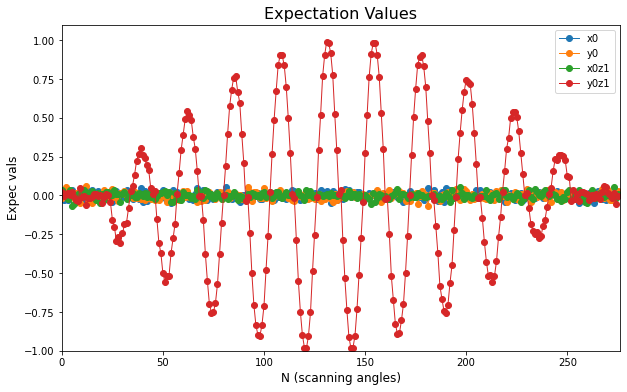

(None, None)

In [16]:
# --Output--
# tomographed process fidelity
# tomographed process matrix
# plot of expectation values (required for constructing droplets)
# droplet plots: [inter = 0: non-interactive matplotlib droplet (boring), inter = 1: interactive plotly droplet (preferred)]
    # if combine = True: gives a single droplet which is combination of f_{0} and f_{1} droplet.
    # if combine = False:
        # f_{0}: droplet corresponds to identity term of the process matrix. 
        # f_{1}: droplet representing the corresponding Pauli component in the process matrix.
     
# The direction of the qubit reflects the direction of the Bloch vector and color represents the phase given by arg[dropelt function].
# color description: red- positive, green- negative, yellow-positive imaginary, blue-negative imaginary
WQPT1Q.WQPT_1Q_runner(res_theta, circuits=circ_u, device=simulator, shots=1024, inter=1, Ut=Up, combine = True)